# Equipo 04

### Grupo 03
### Minería de datos: Viernes de 6 a 9 p.m.

**Integrantes**
* *1821952, Alemán Alvarado Anahí*
* *1819032, Gauna Rodríguez Karyme Mayela*
* *1795134, Sánchez Olvera Ricardo Zarek*

## Base de datos: [COVID-19 in USA](https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_counties_covid19_daily.csv)

**Base extraída de:** [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=COVID19_line_list_data.csv)

## Descripción

El **covid-19** es un coronavirus identificado como la causa de un brote de enfermedad respiratoria detectado por primera vez en Wuhan, China. Al principio, muchos de los pacientes en el brote en Wuhan, China, según se informa, tenían algún vínculo con un gran mercado de mariscos y animales, lo que sugiere una propagación de animal a persona. Sin embargo, se informa que un número creciente de pacientes no ha estado expuesto a los mercados de animales, lo que indica que se está produciendo una propagación de persona a persona. 
El número de casos nuevos aumenta día a día en todo el mundo. Este conjunto de datos tiene información de 50 estados de USA Y el Distrito de Columbia a nivel diario.

### La base de datos está conformada por las columnas:
* **Date:** día/mes/año (fecha en formato largo, descriptivo)
* **City:** Ciudad registrada de USA (descriptivo)
* **State:** Estado registrado de USA (descriptivo)
* **Fips:** Código fips (numérico flotante)
* **Cases:** Casos de contagio (numérico entero)
* **Deaths:** Muertes (numérico entero)
### Tamaño total de la base de datos: (573338,6)   7MB

In [26]:
df.dtypes

date       object
city       object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

In [27]:
df.shape

(573338, 6)

## Justificación del uso de datos

El **covid-19** es una enfermedad que muestra diversos
comportamientos, y hasta el día de hoy los casos de contagios no siguen un orden ni una tendencia exacta, por lo que la principal razón para trabajar con esta base de datos es que nos da una muestra de
características y conceptos que nos dan la oportunidad de pensar en más de una
forma para aplicar la minería de datos por lo que la hizo una base muy accesible para nuestro cometido.

El mayor beneficio que podemos obtener de esta base es encontrar datos
específicos y verídicos de los primeros casos de **covid-19**, tanto
fechas como características, que nos ayudarán a cumplir nuestro objetivo. 

## Objetivos

**Objetivo principal:** Realizar un programa que nos otorgue de manera efectiva los casos de contagio y muertes por **covid-19** en USA de acuerdo al estado 

**Objetivo secundario:**
* Buscar clasificar los casos de contagio y muertes de acuerdo al estado y ciudad registrados de USA
* Aplicar regresión lineal para estudiar la relación entre los casos de contagio y muertes en relación al estado
* Analizar los días con mayor proporción de casos de contagio por estado
* Analizar los días con mayor proporción de muertes por estado

## Herramientas

In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("C:/Users/juanj/Downloads/us_covid19.csv")
df

,date,city,state,fips,cases,deaths
0,21/01/2020,Snohomish,Washington,53061.0,1,0
1,22/01/2020,Snohomish,Washington,53061.0,1,0
2,23/01/2020,Snohomish,Washington,53061.0,1,0
3,24/01/2020,Cook,Illinois,17031.0,1,0
4,24/01/2020,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
573333,26/09/2020,Sweetwater,Wyoming,56037.0,332,2
573334,26/09/2020,Teton,Wyoming,56039.0,536,1
573335,26/09/2020,Uinta,Wyoming,56041.0,350,2
573336,26/09/2020,Washakie,Wyoming,56043.0,113,6


*Datos sin manipulación*

In [14]:
df = pd.read_csv("C:/Users/juanj/Downloads/us_covid19.csv",encoding='utf8')
df

,date,city,state,fips,cases,deaths
0,21/01/2020,Snohomish,Washington,53061.0,1,0
1,22/01/2020,Snohomish,Washington,53061.0,1,0
2,23/01/2020,Snohomish,Washington,53061.0,1,0
3,24/01/2020,Cook,Illinois,17031.0,1,0
4,24/01/2020,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
573333,26/09/2020,Sweetwater,Wyoming,56037.0,332,2
573334,26/09/2020,Teton,Wyoming,56039.0,536,1
573335,26/09/2020,Uinta,Wyoming,56041.0,350,2
573336,26/09/2020,Washakie,Wyoming,56043.0,113,6


*Se aplica una limpieza a nuestra base en caso de existir datos con carácteres extraños*

In [17]:
df = pd.DataFrame(df)

In [18]:
covid_BaseNueva= df.drop('fips', axis=1)

In [82]:
df=pd.DataFrame(covid_BaseNueva)
df

,date,city,state,cases,deaths
0,21/01/2020,Snohomish,Washington,1,0
1,22/01/2020,Snohomish,Washington,1,0
2,23/01/2020,Snohomish,Washington,1,0
3,24/01/2020,Cook,Illinois,1,0
4,24/01/2020,Snohomish,Washington,1,0
...,...,...,...,...,...
573333,26/09/2020,Sweetwater,Wyoming,332,2
573334,26/09/2020,Teton,Wyoming,536,1
573335,26/09/2020,Uinta,Wyoming,350,2
573336,26/09/2020,Washakie,Wyoming,113,6


In [83]:
df.rename(columns = {'date':'Fecha', 'city':'Ciudad', 'state':'Estado', 'cases':'Contagios', 'deaths':'Muertes'})

,Fecha,Ciudad,Estado,Contagios,Muertes
0,21/01/2020,Snohomish,Washington,1,0
1,22/01/2020,Snohomish,Washington,1,0
2,23/01/2020,Snohomish,Washington,1,0
3,24/01/2020,Cook,Illinois,1,0
4,24/01/2020,Snohomish,Washington,1,0
...,...,...,...,...,...
573333,26/09/2020,Sweetwater,Wyoming,332,2
573334,26/09/2020,Teton,Wyoming,536,1
573335,26/09/2020,Uinta,Wyoming,350,2
573336,26/09/2020,Washakie,Wyoming,113,6


*Se eliminó la columna del índice fips ya que no será utilizada para nuestros objetivos*

In [84]:
df= df.rename(columns = {'date':'Fecha', 'city':'Ciudad', 'state':'Estado', 'cases':'Contagios', 'deaths':'Muertes'})

*Se renombraron las columnas para un mejor manejo de la información, sin alteración en la descripción de ninguna columna* 

In [37]:
df.isnull()

,date,city,state,cases,deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
573333,False,False,False,False,False
573334,False,False,False,False,False
573335,False,False,False,False,False
573336,False,False,False,False,False


In [22]:
df.isnull().any()

date      False
city      False
state     False
cases     False
deaths    False
dtype: bool

In [23]:
df.isnull().sum()

date      0
city      0
state     0
cases     0
deaths    0
dtype: int64

*Comprobamos que nuestra base de datos no cuenta con datos nulos*

In [85]:
df.to_csv('Covid19_data.csv')


## Estadística

In [41]:
df2=pd.DataFrame(df,columns=['Contagios','Muertes'])
df2

,Contagios,Muertes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
573333,332,2
573334,536,1
573335,350,2
573336,113,6


In [43]:
df['Contagios'].sum()

580793416

*Este estadístico nos muestra la suma total de casos de contagio, es decir, existen 580 millones 793 mil 416 contagiados por **covid-19** en USA registrados en nuestra base de datos*

In [42]:
df['Muertes'].sum()

21792912

*Este estadístico nos muestra la suma total de muertes, es decir, existen 21 millones 792 mil 912 muertos por **covid-19** en USA registrados en nuestra base de datos*

In [45]:
df['Contagios'].cumsum()

0                 1
1                 2
2                 3
3                 4
4                 5
            ...    
573333    580792381
573334    580792917
573335    580793267
573336    580793380
573337    580793416
Name: Contagios, Length: 573338, dtype: int64

*En este estadístico podemos encontrar el número de contagios acumulados por cada día, es decir, si el día 1 teniamos un contagiado y al segundo día resulta otro contagio, nos muestra que para el segundo día ya existirían 2 contagiados realmente*

In [46]:
df['Muertes'].cumsum()

0                0
1                0
2                0
3                0
4                0
            ...   
573333    21792903
573334    21792904
573335    21792906
573336    21792912
573337    21792912
Name: Muertes, Length: 573338, dtype: int64

*Este otro estadístico nos da el número de muertes acumulados por cada día, es decir, si el día x teníamos 5 muertes y al día x+1 se registra otra muerte, nos muestra que para el día x+1 ya existirían 6 muertes realmente*

In [47]:
df['Contagios'].min()

0

In [48]:
df['Contagios'].max()

266988

*El número de contagios por **covid-19** está en un intervalo de (0,266988) registrados por día*

In [49]:
df['Muertes'].min()

0

In [50]:
df['Muertes'].max()

23795

*El número de muertes por **covid-19** está en un intervalo de (0,23795) registradas por día*

In [51]:
df['Contagios'].mean()

1013.0035267154802

*En promedio 1013 personas se contagian al día en USA*

In [52]:
df['Muertes'].mean()

38.01058363478437

*En promedio 38 personas mueren al día por **covid-19** en USA*

In [56]:
df['Contagios'].median()

82.0

*El valor medio (central) de contagios es 82*

In [55]:
df['Contagios'].std()

6279.205645692469

*En promedio, el número de contagios por **covid-19** se desvía de la media aproximadamente 6279 contagios*

In [57]:
df['Muertes'].median()

1.0

*El valor medio (central) de muertes es 1*

In [58]:
df['Muertes'].std()

408.47033081846837

*En promedio, el número de muertes por **covid-19** se desvía aproximadamente 408 muertes*

In [59]:
df2.cov()

,Contagios,Muertes
Contagios,3.942842e+07,2.107927e+06
Muertes,2.107927e+06,1.668480e+05


*La covarianza entre los casos de contagio y el número de muertes respecto a su media es mayor, es decir, los datos se encuentran muy dispersos respecto a la media*

In [60]:
df2.corr()

,Contagios,Muertes
Contagios,1.000000,0.821846
Muertes,0.821846,1.000000


*Existe una correlación menor a 1 entre los casos de contagios y el número de muertes, es decir, existe una relación positiva fuerte entre ambas variables*

### Resumen
* **Existen 580,793,416 casos de contagio por covid-19 en USA**
* **Al día de hor cerca de  21,792,912 de personas han muerto por covid-19 en USA**
* **El mayor número de contagios por covid-19 es de 266,988 por día**
* **El mayor número de muertes por covid-19 es de 23,795 por día**
* **En promedio 1013 personas se contagian al día en USA**
* **En promedio 38 personas mueren al día por covid-19 en USA**
* **Los casos de contagio y el número de muertes se encuentran muy dispersos respecto a su valor medio**
* **Los casos de contagios y el número de muertes tienen una fuerte relación, pero no significa que el número de contagios influye directamente en el número de muertes**

Con estos datos poco a poco podemos ir dandole forma a lo que queremos obtener finalmente, pero aún es necesario seguir trabajando con nuestros datos observados. 


## Gráficas

In [61]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

In [121]:
df= pd.read_csv('Covid19_data.csv')
df

,Unnamed: 0,Fecha,Ciudad,Estado,Contagios,Muertes
0,0,21/01/2020,Snohomish,Washington,1,0
1,1,22/01/2020,Snohomish,Washington,1,0
2,2,23/01/2020,Snohomish,Washington,1,0
3,3,24/01/2020,Cook,Illinois,1,0
4,4,24/01/2020,Snohomish,Washington,1,0
...,...,...,...,...,...,...
573333,573333,26/09/2020,Sweetwater,Wyoming,332,2
573334,573334,26/09/2020,Teton,Wyoming,536,1
573335,573335,26/09/2020,Uinta,Wyoming,350,2
573336,573336,26/09/2020,Washakie,Wyoming,113,6


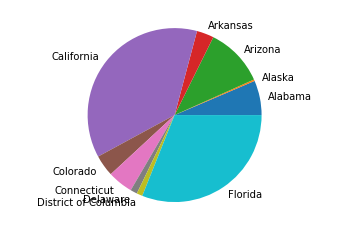

In [91]:
sums = df.groupby(df["Estado"])["Contagios"].sum().head(10)
axis('equal');
pie(sums, labels=sums.index);
show()

*La gráfica de pastel nos ayuda a visualizar, en este caso,la proporción que representan el número de contagios por cada estado de USA registrados en nuestra base de datos. Podemos ver que California es el estado con mayor número de contagios, seguido por Florida, mientras que los estados con menor cantidad de contagios son Alaska y el distrito de Columbia*

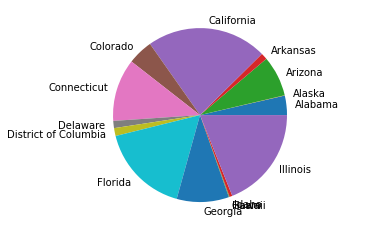

In [87]:
sums = df.groupby(df["Estado"])["Muertes"].sum().head(15)
axis('equal');
pie(sums, labels=sums.index);
show()

*En esta otra gráfica podemos observar la proporción de número de muertes por cada estado de USA registrados en nuestra base de datos. Vemos que California continua teniendo el primer lugar con mayor número de muertes seguido esta vez por Illinois, mientras que los estados con menor número de muertes son nuevamente Alaska y ahora Hawaii* 

*En conjunto con la gráfica anterior encontramos que la relación entre los casos de contagios y muertes no es directamente proporcional, ya que la proprción de muertes no depende exactamente de la proprción de contagios existentes*

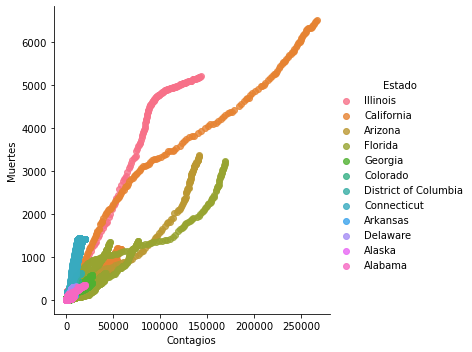

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Contagios', y='Muertes', hue='Estado', 
           data=df.loc[df['Estado'].isin(['California','Arkansas','Arizona','Alaska','Alabama','Florida','District of Columbia','Connecticut','Colorado','Illinois','Georgia','Delaware'])], 
           fit_reg=False)

*En esta gráfica podemos observar la dispersión que existe en relación a los casos de contagio y muertes respecto a los estados con mayor proporción vistos en las gráficas anteriores* 

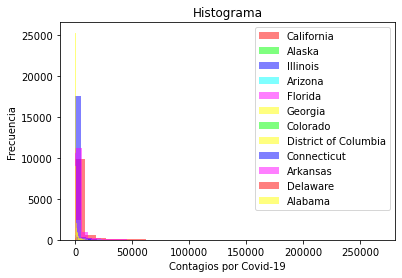

In [155]:
cal = plt.hist(df[df["Estado"] == "California"].Contagios,bins=30,fc = (1,0,0,0.5),label = "California")
alk = plt.hist(df[df["Estado"] == "Alaska"].Contagios,bins=30,fc = (0,1,0,0.5),label = "Alaska")
il = plt.hist(df[df["Estado"] == "Illinois"].Contagios,bins=30,fc = (0,0,1,0.5),label = "Illinois")
ar = plt.hist(df[df["Estado"] == "Arizona"].Contagios,bins=30,fc = (0,1,1,0.5),label = "Arizona")
fl = plt.hist(df[df["Estado"] == "Florida"].Contagios,bins=30,fc = (1,0,1,0.5),label = "Florida")
ge = plt.hist(df[df["Estado"] == "Georgia"].Contagios,bins=30,fc = (1,1,0,0.5),label = "Georgia")
col = plt.hist(df[df["Estado"] == "olorado"].Contagios,bins=30,fc = (0,1,0,0.5),label = "Colorado")
dfc = plt.hist(df[df["Estado"] == "District of Columbia"].Contagios,bins=30,fc = (1,1,0,0.5),label = "District of Columbia")
con = plt.hist(df[df["Estado"] == "Connecticut"].Contagios,bins=30,fc = (0,0,1,0.5),label = "Connecticut")
ark = plt.hist(df[df["Estado"] == "Arkansas"].Contagios,bins=30,fc = (1,0,1,0.5),label = "Arkansas")
dlw = plt.hist(df[df["Estado"] == "Delaware"].Contagios,bins=30,fc = (1,0,0,0.5),label = "Delaware")
alb = plt.hist(df[df["Estado"] == "Alabama"].Contagios,bins=30,fc = (1,1,0,0.5),label = "Alabama")
plt.legend()
plt.xlabel("Contagios por Covid-19")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

*Esta última gráfica nos muestra la frecuencia de los casos de contagio por **covid-19** en los estádos con mayor proporción según las primeras gráficas*

### Conclusión
Con la práctica de este avance tuvimos la oportunidad de darle mayor sentido a nuestros objetivos por cumplir observando el manejo y el comportamiento de los datos. Efectivamente, fue necesario cambiar algunas estrategías para poder analizar lo que esperamos obtener al finalizar nuestro proyecto. Aún faltan ajustes por realizar y prácticas que son necesarias para lograr cumplir todos nuestros objetivos, pero con la información manejada hasta ahora podemos concluir que nuestra base de datos ayuda a obtener suficiente información y por lo menos podremos cumplir con más de uno de los objetivo propuestos. 